In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay


In [3]:
# Load dataset with selected features
df = pd.read_csv("../data/cleveland_selected_features.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (especially needed for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("-" * 40)

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    return model


Logistic Regression Performance:
Accuracy: 0.7803468208092486
Precision: 0.7987421383647799
Recall: 0.9548872180451128
F1-score: 0.8698630136986302
----------------------------------------
Decision Tree Performance:
Accuracy: 0.861271676300578
Precision: 0.9097744360902256
Recall: 0.9097744360902256
F1-score: 0.9097744360902256
----------------------------------------
Random Forest Performance:
Accuracy: 0.8901734104046243
Precision: 0.9071428571428571
Recall: 0.9548872180451128
F1-score: 0.9304029304029304
----------------------------------------
Support Vector Machine Performance:
Accuracy: 0.8323699421965318
Precision: 0.8823529411764706
Recall: 0.9022556390977443
F1-score: 0.8921933085501859
----------------------------------------


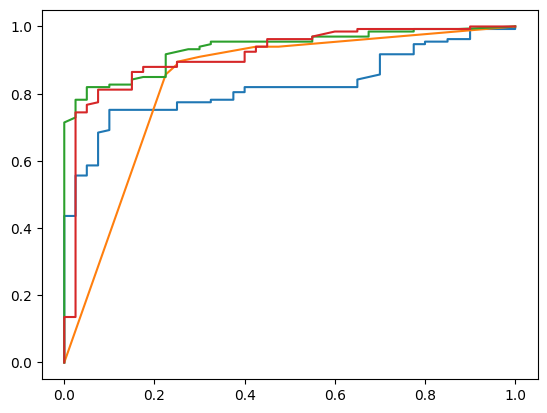

In [5]:
# Dictionary to hold trained models
models = {}

# Logistic Regression
models["Logistic Regression"] = evaluate_model(
    "Logistic Regression",
    LogisticRegression(max_iter=1000),
    X_train_scaled, y_train, X_test_scaled, y_test
)

# Decision Tree
models["Decision Tree"] = evaluate_model(
    "Decision Tree",
    DecisionTreeClassifier(random_state=42),
    X_train, y_train, X_test, y_test
)

# Random Forest
models["Random Forest"] = evaluate_model(
    "Random Forest",
    RandomForestClassifier(random_state=42),
    X_train, y_train, X_test, y_test
)

# Support Vector Machine (SVM)
models["SVM"] = evaluate_model(
    "Support Vector Machine",
    SVC(kernel='rbf', probability=True),
    X_train_scaled, y_train, X_test_scaled, y_test
)
